In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score 


In [2]:
data = pd.read_csv("/Users/edwardamoah/Documents/GitHub/pv_mrv/statistical_analysis/output/dbh_algorithm_evaluation_dataset.csv")

In [4]:
data.measured_dbh.describe()

count    142.000000
mean      21.976056
std       12.190695
min        5.100000
25%       12.025000
50%       21.400000
75%       29.750000
max       61.500000
Name: measured_dbh, dtype: float64

In [5]:
from sklearn.metrics import mean_squared_error
import numpy as np
actual = data['measured_dbh']
predicted = data['predicted_dbh']
rmse = np.sqrt(mean_squared_error(actual, predicted))
rmse


2.233214382649646

Text(2, 30, 'RMSE = 2.23 ')

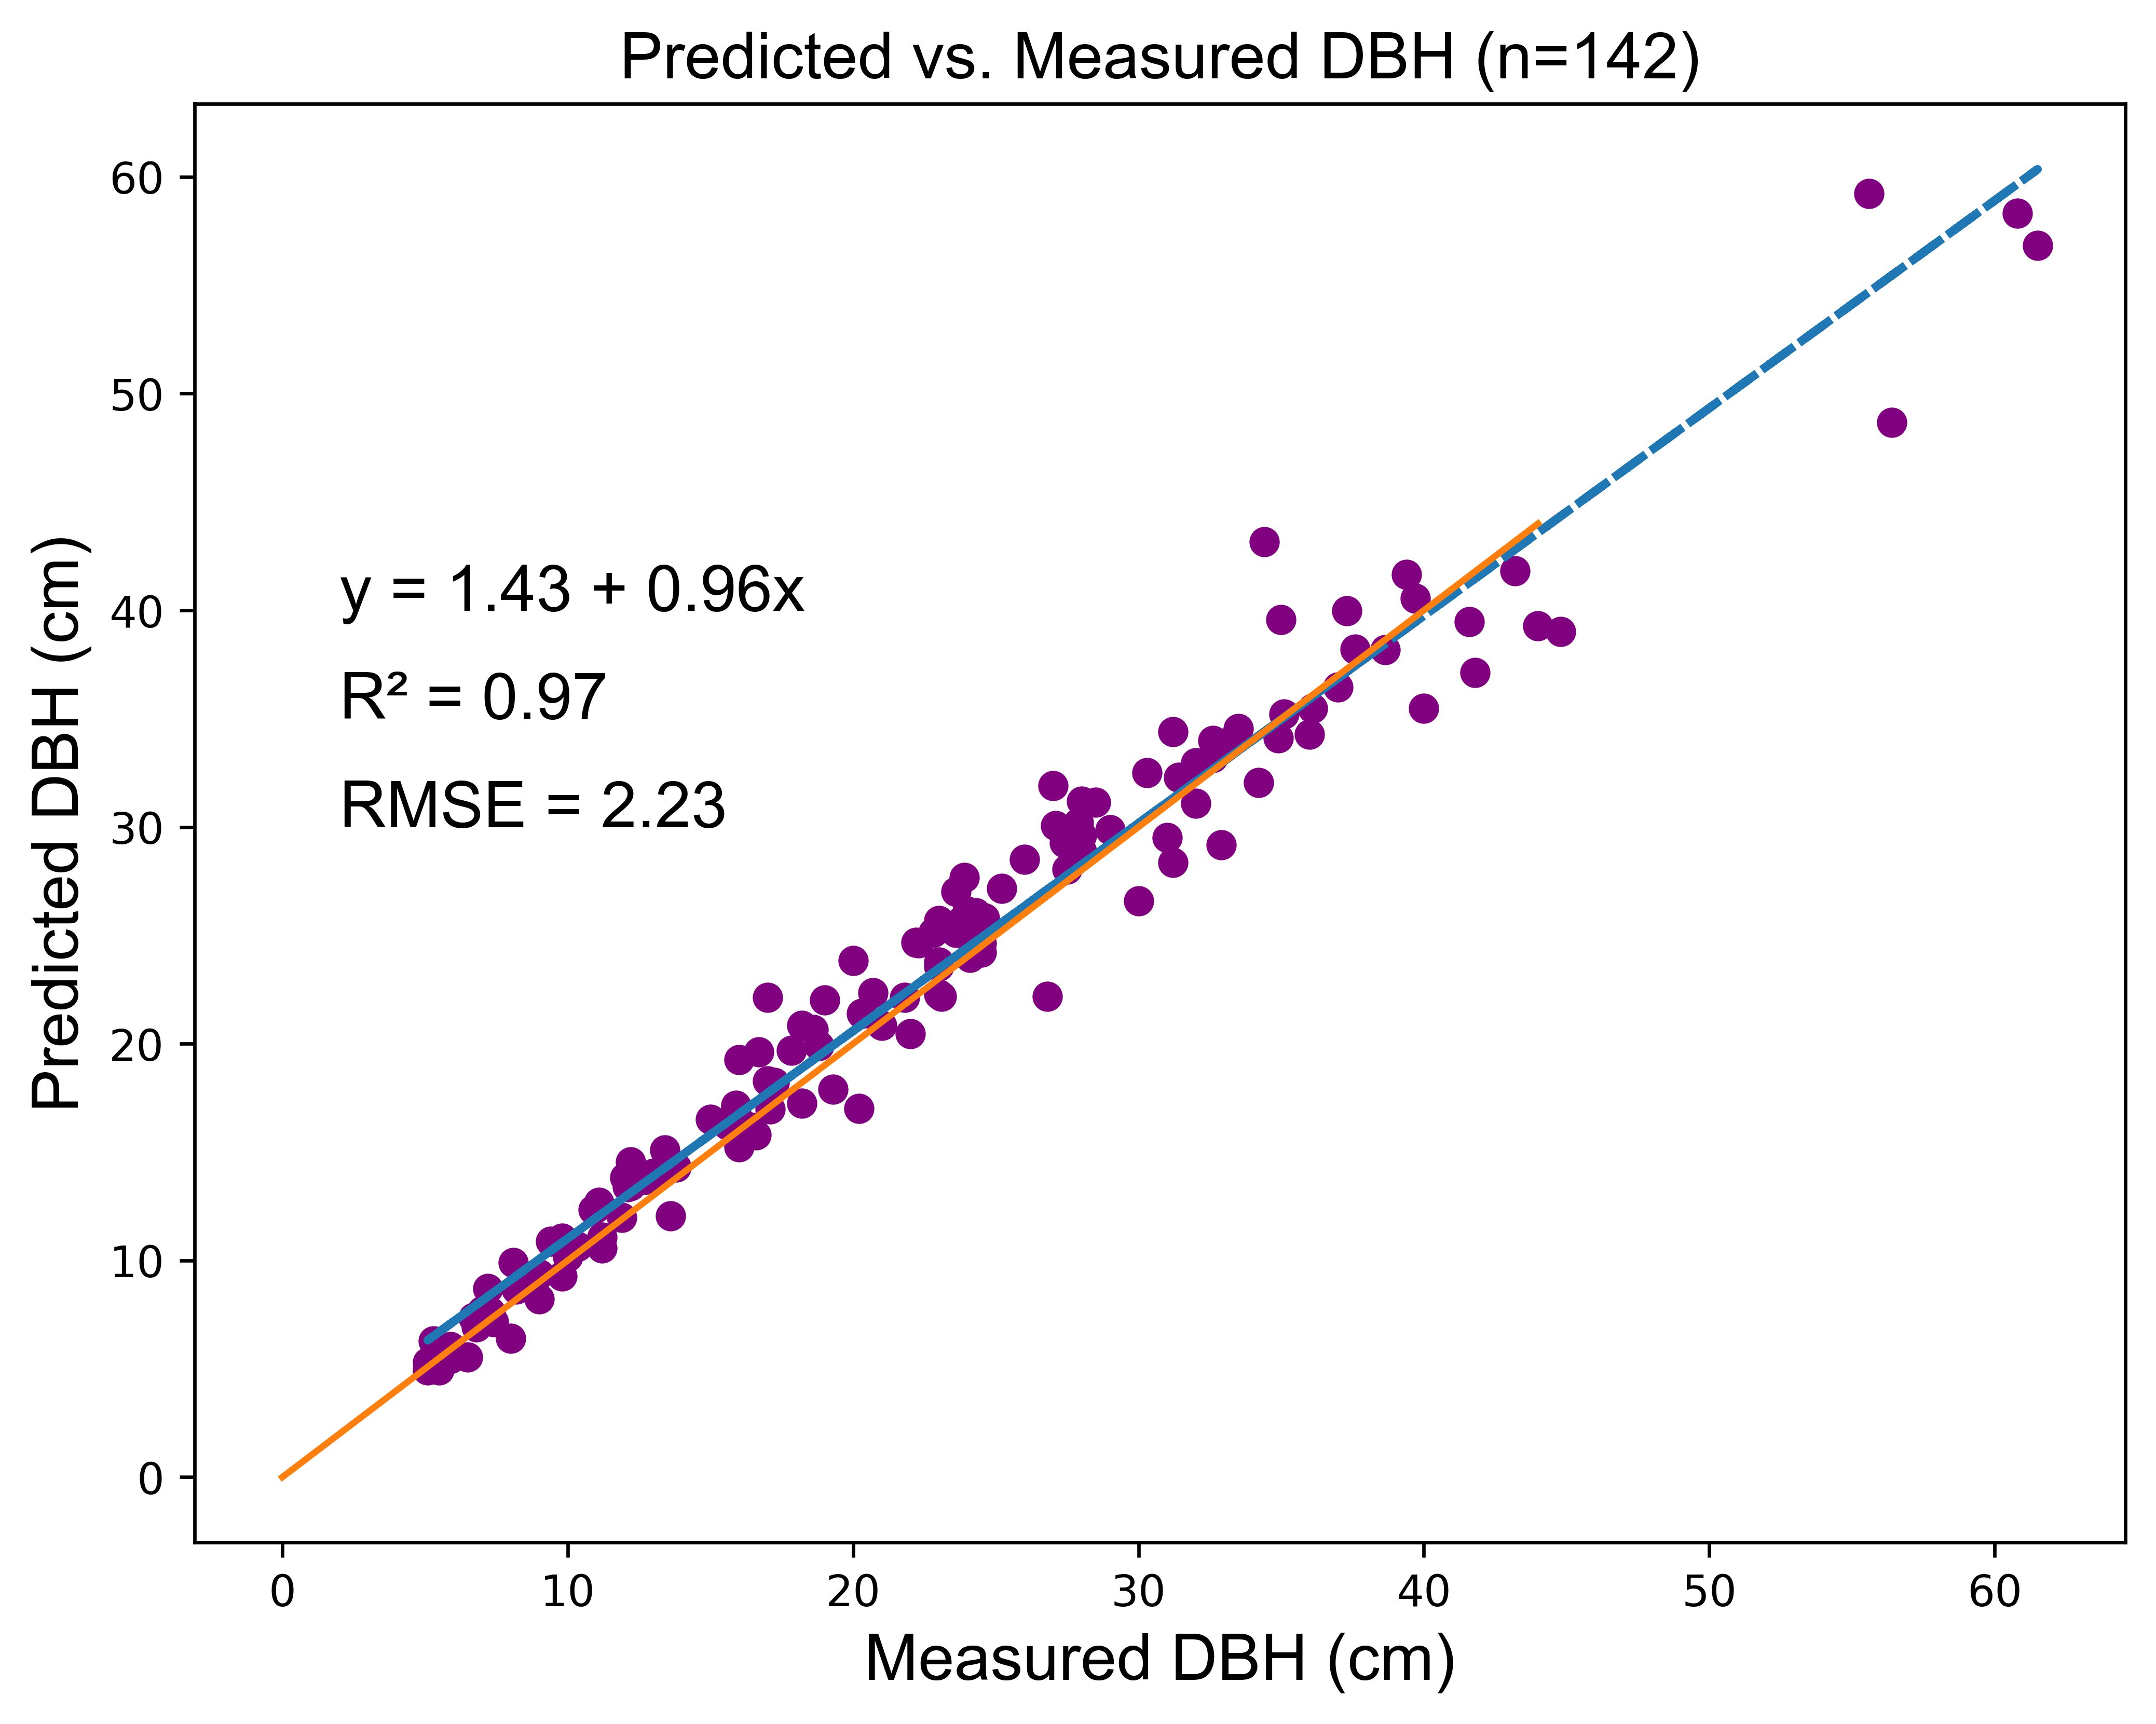

In [31]:
# make residual plot for the corelation between predicted and measure dbh values
x = np.array(data['measured_dbh']); y = np.array( [ float(x) for x in data['predicted_dbh']])
a, b = np.polyfit(x, y , 1)

figure(figsize=(8, 6), dpi=600)

# font 
font = {'fontname':'Arial'}


plt.scatter(x, y, color='purple')
plt.plot(x, a*x+b, linestyle='--', linewidth=2)
plt.plot(np.arange(45), np.arange(45))
plt.xlabel("Measured DBH (cm)", **font, size=15)
plt.ylabel("Predicted DBH (cm)", **font, size=15)
plt.title(f"Predicted vs. Measured DBH (n={len(data)})", **font, size=15)

# add fitted regression equation to plot
plt.text(2, 40, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=15, **font)

# add the r2
plt.text(2,35, f"R\u00b2 = {round(r2_score(x,y),2)} ", size=15, **font)

# add rmse
plt.text(2,30, f"RMSE = {round(rmse,2)} ", size=15, **font)

In [10]:
def getRange(dbh):
    if dbh < 16:
        return "5.0-15.9"
    elif dbh < 26:
        return "16.0-25.9"
    elif dbh < 36:
        return "26.0-35.9"
    return "36+"

In [11]:
data["ranges"] = data.measured_dbh.apply(getRange)

In [22]:
def Bias(pred, obs):
    return pred - obs

def relBias(pred, obs):
    return ((pred-obs)/obs)*100

In [23]:
data["bias"] = data.apply(lambda x: Bias(x.predicted_dbh, x.measured_dbh), axis=1)
data["relBias"] = data.apply(lambda x: relBias(x.predicted_dbh, x.measured_dbh), axis=1)

Text(0.5, 1.0, 'Bias by Measured DBH')

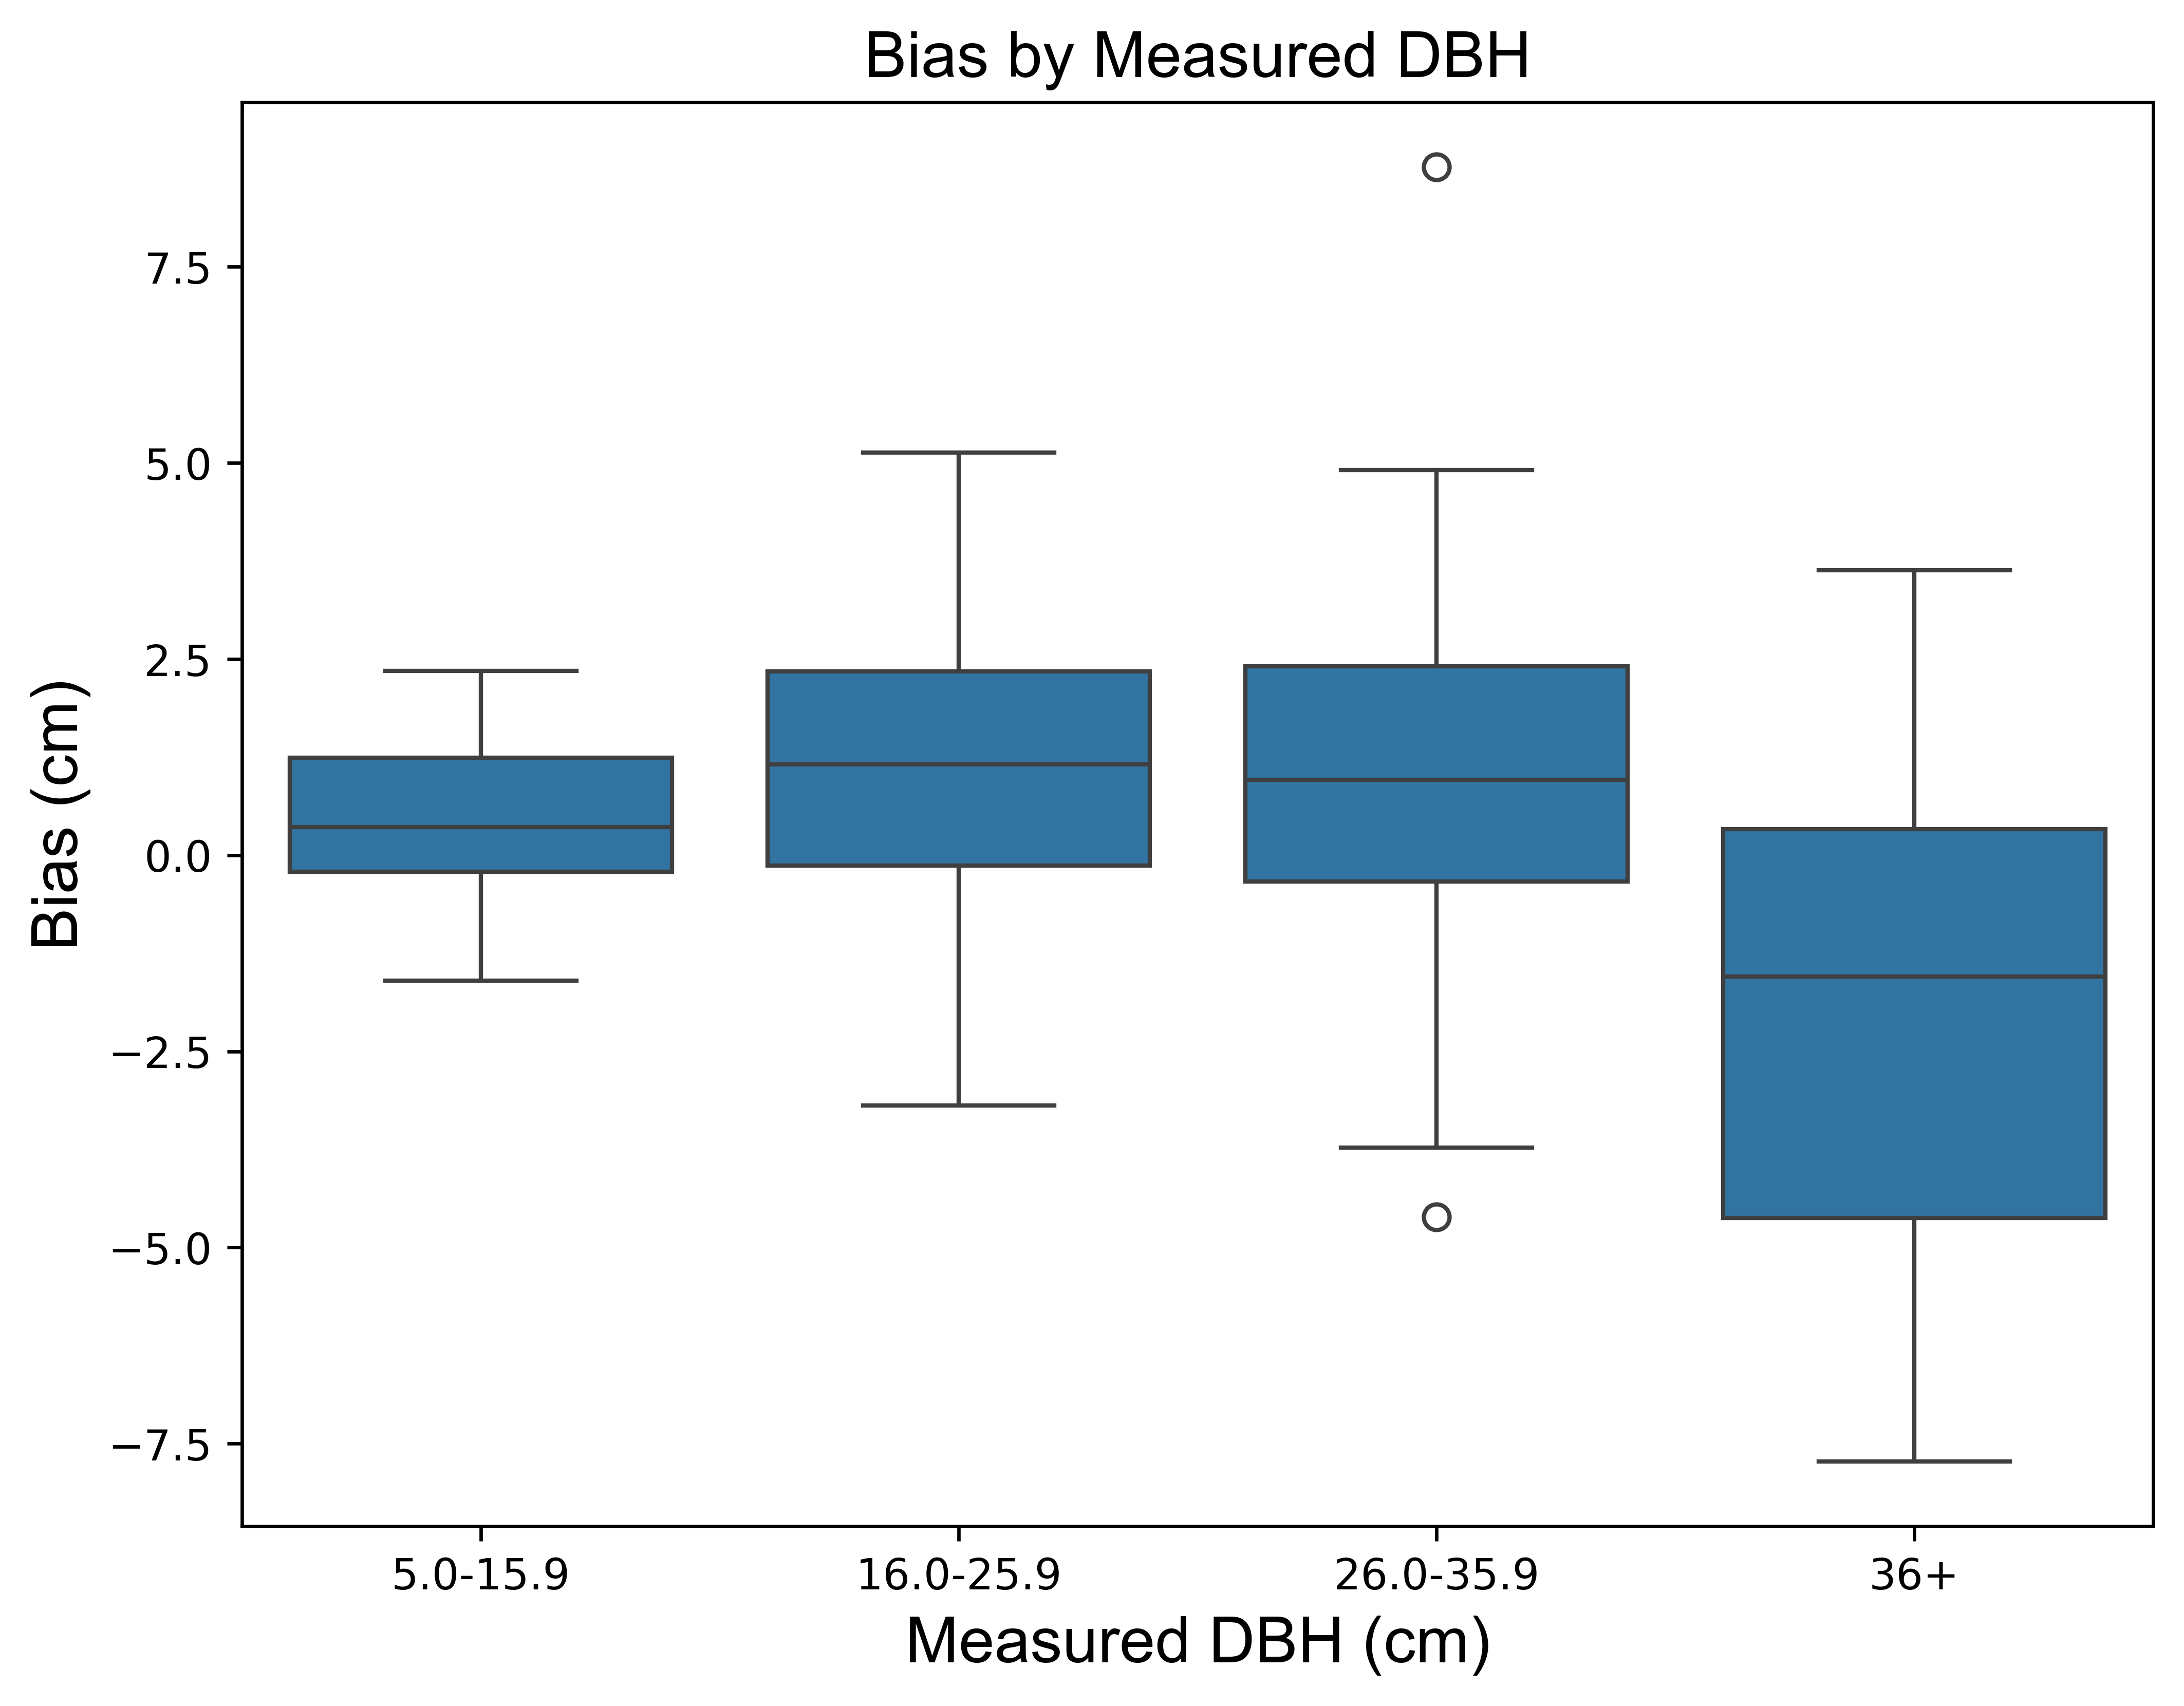

In [32]:
figure(figsize=(8, 6), dpi=600)
sns.boxplot(x="ranges", y="bias", data=data, order=['5.0-15.9','16.0-25.9', '26.0-35.9', '36+'])
plt.xlabel("Measured DBH (cm)", **font, size=15)
plt.ylabel("Bias (cm)", **font, size=15)
plt.title("Bias by Measured DBH", **font, size=15)

Text(0.5, 1.0, 'Relative Bias by Measured DBH')

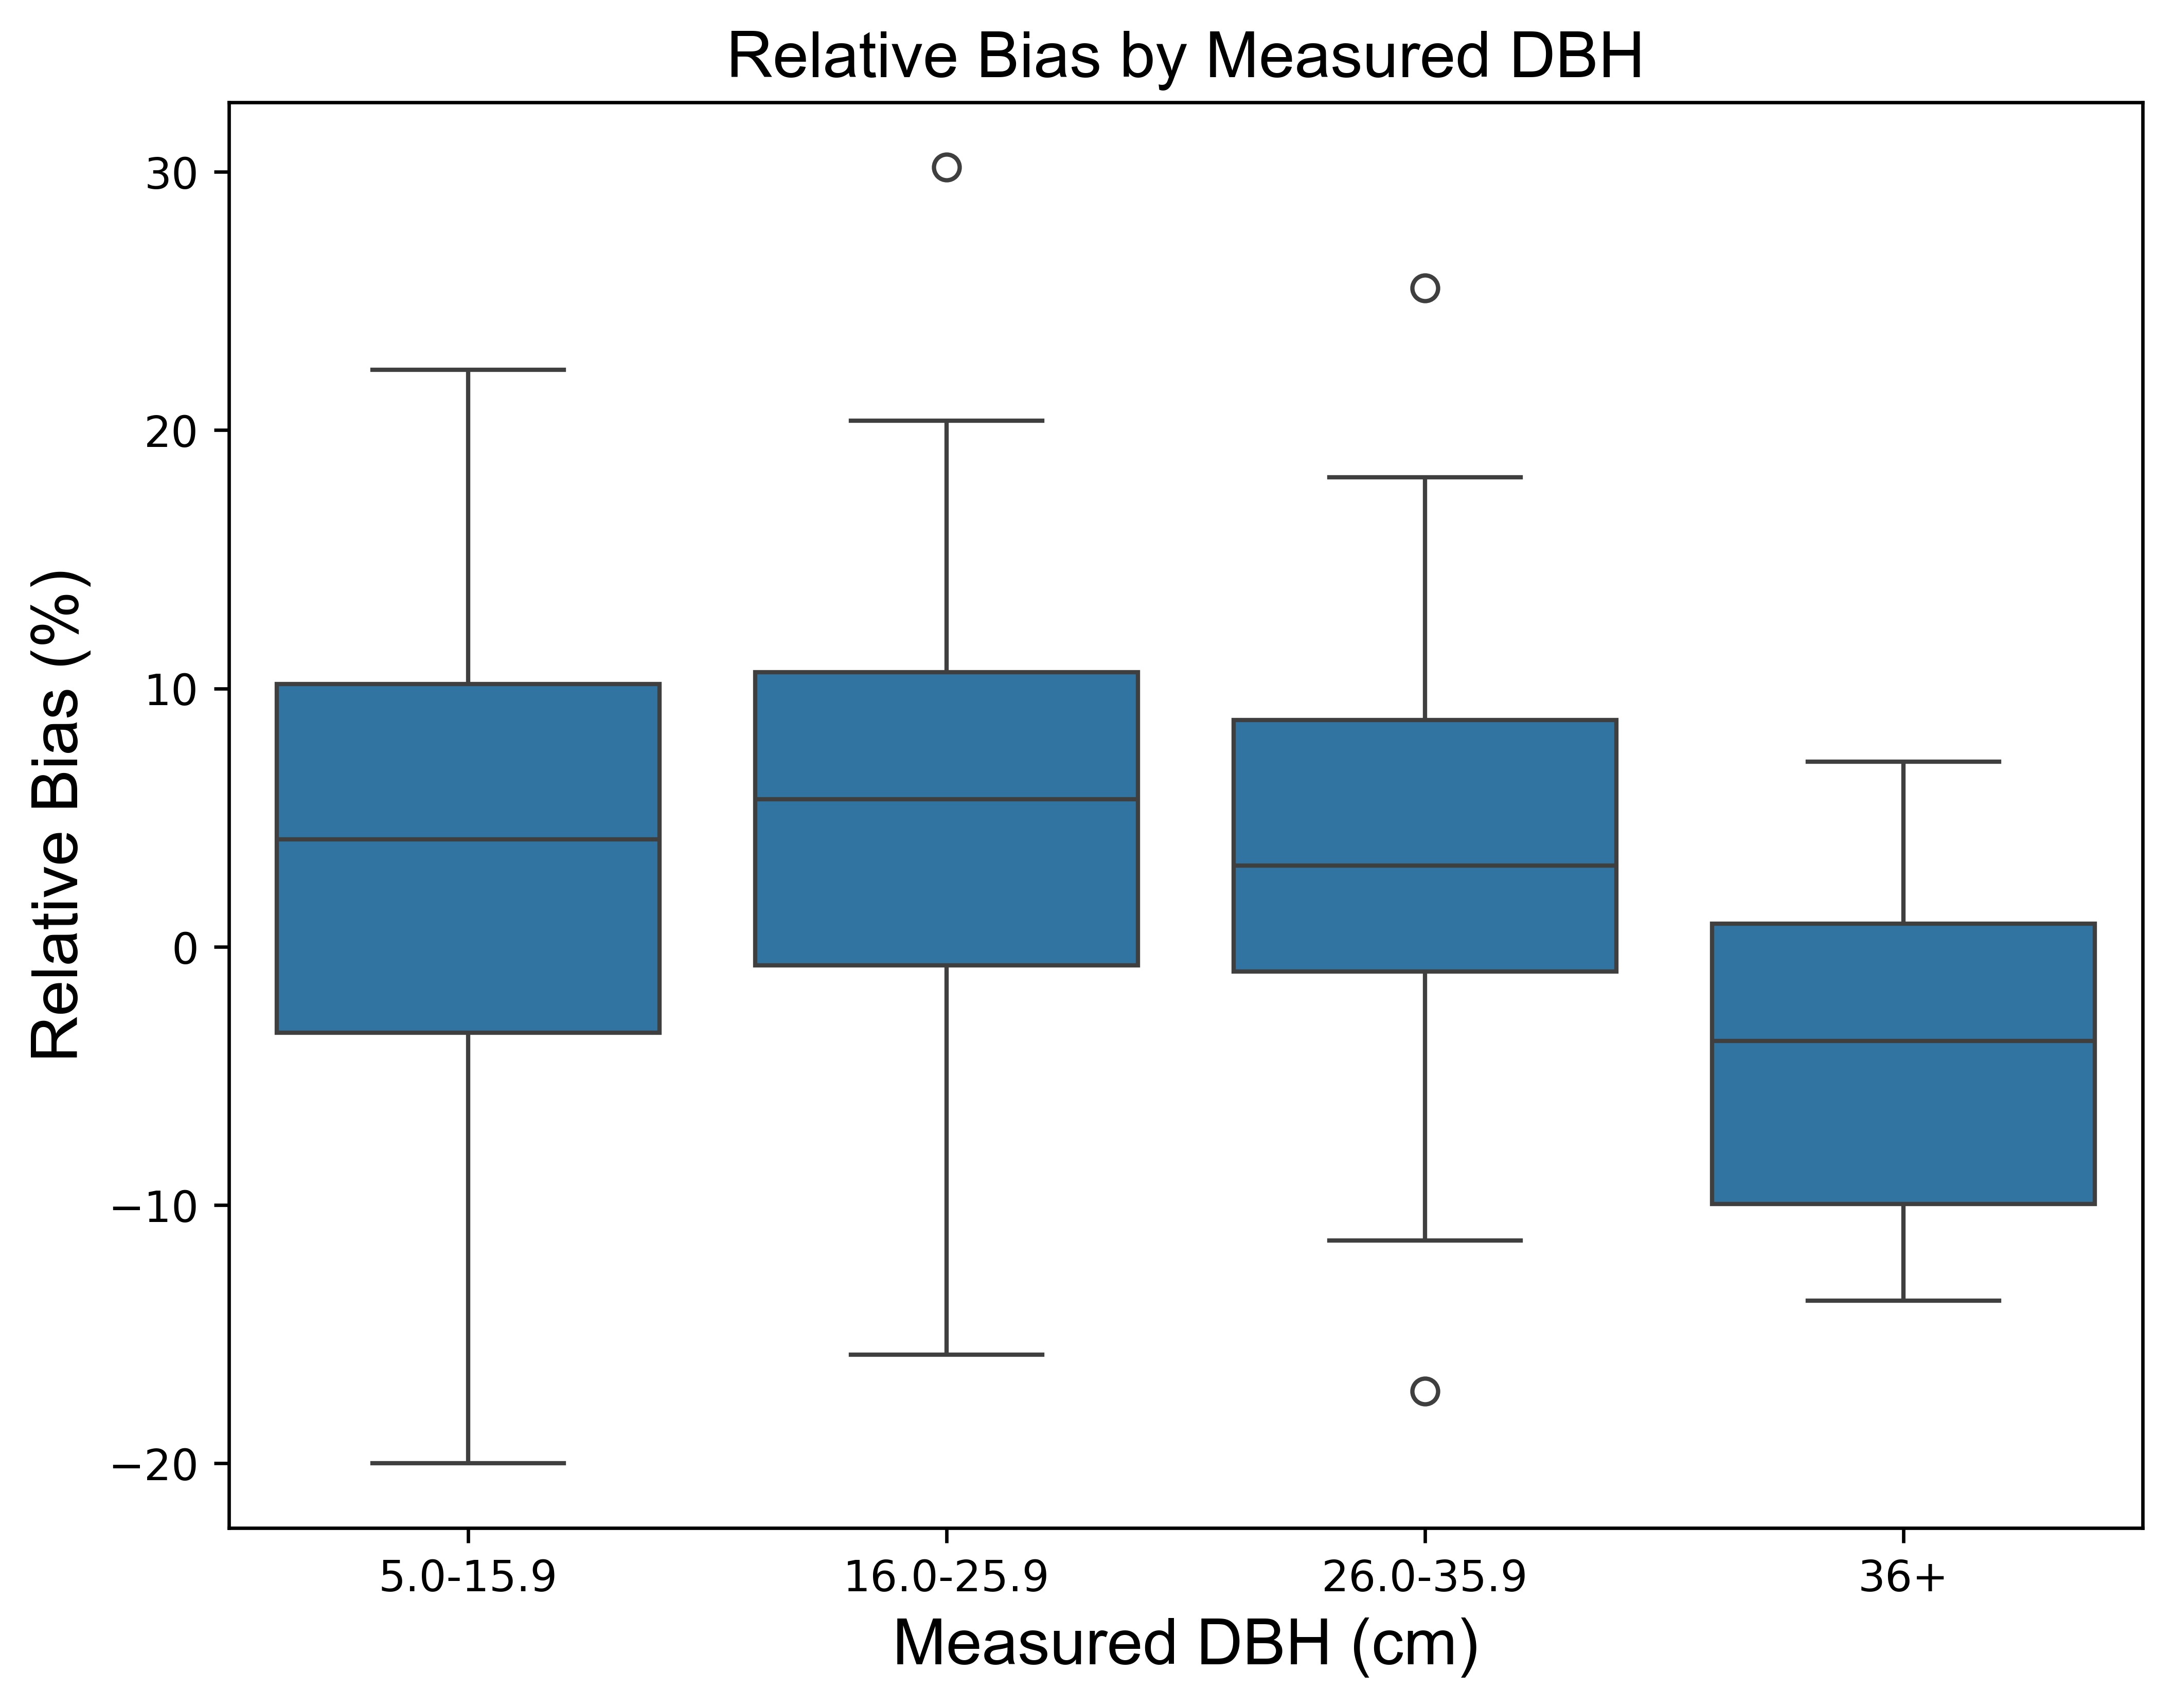

In [33]:
figure(figsize=(8, 6), dpi=600)
sns.boxplot(x="ranges", y="relBias", data=data, order=['5.0-15.9','16.0-25.9', '26.0-35.9', '36+'])
plt.xlabel("Measured DBH (cm)", **font, size=15)
plt.ylabel("Relative Bias (%)", **font, size=15)
plt.title("Relative Bias by Measured DBH", **font, size=15)